In [1]:
# !pip install -U -qq gdown kaggle

# from google.colab import drive
# drive.mount('/content/drive')

# import os
# !mkdir -p ~/.kaggle/ && cp /content/drive/MyDrive/all_AI_code/kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

In [1]:
import sys
sys.path.insert(1, "../")
import kaggle_api

In [2]:
# !kaggle competitions download -c hackathon-online-realfakenumbers

100%|██████████████████████████████████████| 1.79M/1.79M [00:01<00:00, 1.58MB/s]
100%|██████████████████████████████████████| 1.79M/1.79M [00:01<00:00, 1.39MB/s]


In [3]:
import zipfile
import os
import os
from glob import glob

In [4]:
with zipfile.ZipFile("./hackathon-online-realfakenumbers.zip", "r") as zip_ref:
    print("Unzipping main_zip data...") 
    zip_ref.extractall('./data/')

os.remove("./hackathon-online-realfakenumbers.zip")

Unzipping main_zip data...


In [5]:
def walk_through_dir(dir_path):
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"'{dirpath}' There are {len(dirnames)} directories and {len(filenames)} flie(s).")

walk_through_dir('./data/')

'./data/' There are 2 directories and 1 flie(s).
'./data/Train_1000' There are 1 directories and 0 flie(s).
'./data/Train_1000/Train_1000รูป' There are 2 directories and 0 flie(s).
'./data/Train_1000/Train_1000รูป/0' There are 0 directories and 487 flie(s).
'./data/Train_1000/Train_1000รูป/1' There are 0 directories and 514 flie(s).
'./data/test_set-20230712T063018Z-001' There are 1 directories and 0 flie(s).
'./data/test_set-20230712T063018Z-001/test_set' There are 1 directories and 0 flie(s).
'./data/test_set-20230712T063018Z-001/test_set/test' There are 0 directories and 1010 flie(s).


In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from PIL import Image, ImageChops, ImageEnhance

image_size = (224, 224)

def convert_to_ela_image(image, quality=90):
    temp_filename = 'temp_file_name.jpg'
    ela_filename = 'temp_ela.png'
    image.save(temp_filename, 'JPEG', quality = quality)
    temp_image = Image.open(temp_filename)
    
    ela_image = ImageChops.difference(image, temp_image)
    
    extrema = ela_image.getextrema()
    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:
        max_diff = 1
    scale = 255.0 / max_diff
    
    ela_image = ImageEnhance.Brightness(ela_image).enhance(scale)
    
    return Image.fromarray(np.array(ela_image))

(28, 28)
(224, 224)


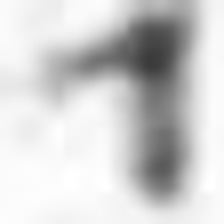

In [7]:
real_image_path = './data/Train_1000/Train_1000รูป/0/F_ (110).jpg'
img = Image.open(real_image_path)
print(img.size)
new_img = img.resize(image_size)
print(new_img.size)
new_img

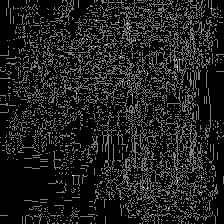

In [8]:
convert_to_ela_image(new_img)

(28, 28)
(224, 224)


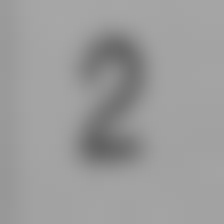

In [9]:
fake_image_path = './data/Train_1000/Train_1000รูป/1/R_ (114).png'
img = Image.open(fake_image_path)
print(img.size)
new_img = img.resize(image_size)
print(new_img.size)
new_img

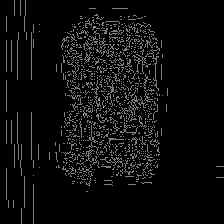

In [10]:
convert_to_ela_image(new_img)

In [20]:
image_path = glob('./data/Train_1000/Train_1000รูป/*/*')
print(len(image_path))
df_train = pd.DataFrame({"path":image_path})
df_train['label'] = df_train['path'].map(lambda x : x.split("/")[-2])
df_train.sample(3)

1001


,path,label
687,./data/Train_1000/Train_1000รูป/1/R_ (18).png,1
647,./data/Train_1000/Train_1000รูป/1/R_ (43).png,1
736,./data/Train_1000/Train_1000รูป/1/R_ (353).jpg,1


In [21]:
df_train['fold'] =-1
fold = 0
for i in range(len(df_train)):
    if i!=0 :
            fold += 1
    if fold ==10 :
        fold =0
    df_train.loc[i,'fold'] = fold
#random shuffle   
df_train=df_train.sample(frac=1)
df_train

,path,label,fold
164,./data/Train_1000/Train_1000รูป/0/F_ (65).png,0,4
459,./data/Train_1000/Train_1000รูป/0/F_ (60).png,0,9
131,./data/Train_1000/Train_1000รูป/0/F_ (49).jpg,0,1
602,./data/Train_1000/Train_1000รูป/1/R_ (72).png,1,2
911,./data/Train_1000/Train_1000รูป/1/R_ (205).jpg,1,1
...,...,...,...
172,./data/Train_1000/Train_1000รูป/0/F_ (53).png,0,2
85,./data/Train_1000/Train_1000รูป/0/F_ (344).jpg,0,5
909,./data/Train_1000/Train_1000รูป/1/R_ (30).jpg,1,9
977,./data/Train_1000/Train_1000รูป/1/R_ (89).png,1,7


In [16]:
BASE_DIR = "./data/test_set-20230712T063018Z-001/test_set/test/"
df_test = pd.read_csv('./data/sample_submission.csv')
df_test['path'] = BASE_DIR + df_test['img_name']
print(len(df_test))
df_test.sample(3)

1010


,img_name,code,path
523,new_name_523.png,NaN,./data/test_set-20230712T063018Z-001/test_set/...
848,new_name_848.png,NaN,./data/test_set-20230712T063018Z-001/test_set/...
680,new_name_680.png,NaN,./data/test_set-20230712T063018Z-001/test_set/...
